# Menampilkan Masking
Menampilkan masking dari gambar yang ada di dataset

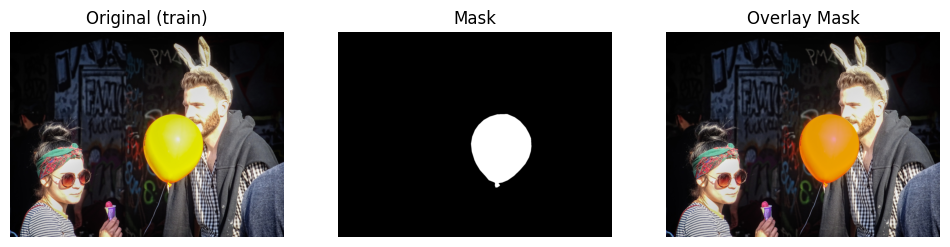

In [3]:
import json
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

# Path ke file JSON label
json_path = "/home/irium/htdocs/Mask_RCNNakTwelve/Mask_RCNN/datasets/balloon/train/via_region_data.json"  # ganti sesuai lokasi file JSON kamu
train_dir = "/home/irium/htdocs/Mask_RCNNakTwelve/Mask_RCNN/datasets/balloon/train"       # folder gambar training
val_dir = "/home/irium/htdocs/Mask_RCNNakTwelve/Mask_RCNN/datasets/balloon/val"           # folder gambar validation

# Load JSON
with open(json_path, "r") as f:
    data = json.load(f)

# Pilih satu file untuk dicek
for key, value in data.items():
    filename = value["filename"]
    img_path_train = os.path.join(train_dir, filename)
    img_path_val = os.path.join(val_dir, filename)

    # Cek apakah ada di train atau val
    if os.path.exists(img_path_train):
        img_path = img_path_train
        set_type = "train"
    elif os.path.exists(img_path_val):
        img_path = img_path_val
        set_type = "val"
    else:
        print(f"[WARNING] Gambar {filename} tidak ditemukan di train/val folder!")
        continue

    # Baca gambar
    image = cv2.imread(img_path)
    if image is None:
        print(f"[ERROR] Gagal membaca gambar {img_path}")
        continue

    # Ambil polygon
    regions = value["regions"]
    for _, region in regions.items():
        shape = region["shape_attributes"]
        all_points_x = shape["all_points_x"]
        all_points_y = shape["all_points_y"]

        # Gabungkan x,y ke array koordinat
        pts = np.array(list(zip(all_points_x, all_points_y)), dtype=np.int32)

        # Buat masking hitam
        mask = np.zeros(image.shape[:2], dtype=np.uint8)
        cv2.fillPoly(mask, [pts], 255)  # Polygon warna putih di mask

        # Overlay mask ke gambar (warna merah transparan)
        overlay = image.copy()
        overlay[mask == 255] = (0, 0, 255)
        blended = cv2.addWeighted(image, 0.7, overlay, 0.3, 0)

        # Tampilkan hasil
        plt.figure(figsize=(12, 6))
        plt.subplot(1, 3, 1)
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        plt.title(f"Original ({set_type})")
        plt.axis("off")

        plt.subplot(1, 3, 2)
        plt.imshow(mask, cmap="gray")
        plt.title("Mask")
        plt.axis("off")

        plt.subplot(1, 3, 3)
        plt.imshow(cv2.cvtColor(blended, cv2.COLOR_BGR2RGB))
        plt.title("Overlay Mask")
        plt.axis("off")

        plt.show()

    # Hanya cek satu file dulu
    break
